## up206a: Midterm Assignment: Barcelona Average Monthly Rent - 2014-2018 and Barcelona Average Demand Rental Price and Offer Rental Price for 2018

**Casey Leedom**

This assignment uses data from the Barcelona City Hall Open Data site regarding average monthly rent and average monthly rent/m^2 by neighborhood in Barcelona. Data was analyzed to determine the rise in rent between the years 2014-2018. The assignment also pulls in 2018 Average Demand Rental Price and Average Offer Rental Price from the Barcelona Housing Observatory (O-HB) site. 

For this midterm assignment, we were tasked with creating three charts and two maps (one interactive, one static). This notebook contains part of our midterm, focused on barri-level data in Barcelona. The Midterm_Spanish_Housing_Mkt notebook that Tiffany created focuses on overall eviction data in Spain. 

### Import python modules

In [1]:
# Import geopandas
import geopandas as gpd

In [2]:
# and regular pandas
import pandas as pd

In [3]:
# to provide basemaps 
import contextily as ctx

In [4]:
# to give more power to your figures (plots)
import matplotlib.pyplot as plt

In [5]:
# for interactive maps
import plotly.express as px

### Bring in data files

data file #1: spatial data file including geometry for neighborhoods

data files #2-8: data files for average monthly rent (2014-2019)

data files #9-10: data files for average demand and offer rental price (2018)

In [6]:
bb = gpd.read_file('Data/shapefiles_barrio_barcelona.geojson')

In [7]:
amr2014 = gpd.read_file('Data/2014_Average monthly rent_Barcelona.csv')
amr2015 = gpd.read_file('Data/2015_Average monthly rent_Barcelona.csv')
amr2016 = gpd.read_file('Data/2016_Average monthly rent_Barcelona.csv')
amr2017 = gpd.read_file('Data/2017_Average monthly rent_Barcelona.csv')
amr2018 = gpd.read_file('Data/2018_Average monthly rent_Barcelona.csv')
amr2019 = gpd.read_file('Data/2019_Average monthly rent_Barcelona.csv')
amr2020 = gpd.read_file('Data/2020_Average monthly rent_Barcelona.csv')

In [8]:
adrp2018 = gpd.read_file('Data/Housing Market_Average demand rental price_2018_barri.csv')
aorp2018 = gpd.read_file('Data/Housing Market_Average offer rental price_2018_barri.csv')

### Clean up data file #1: spatial data

We've worked with this dataframe before. It needs to be trimmed to only include the columns: c_barri, n_barri, and geometry.  

In [9]:
# Trim the dataframe so that we just have the number of the neighborhood, name of the neighborhood (for backchecking),
# and the geometry. Print the first 5 rows to test. 

bb_tr = bb[['c_barri','n_barri','geometry']]
bb_tr.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4       12             la Marina del Prat Vermell   

                                            geometry  
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...  
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...  
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...  
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...  
4  MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3...

### Data Clean-up: 2014-2019 Average Monthly Rent Data

We've streamlined the data cleanup to have the same steps for each year, 2014-2019. The one difference is that the 2019 data has "N/A" values, whereas the 2014-2018 data have "NA" values. We've used query to eliminate this data in this section, so that it does not mess with our statistics later. 

#### Separate data

First we need to separate the monthly rent data from the monthly rent/m^2

In [10]:
# Separate out the  monthly rent per m^2 

amr2019_m2 = amr2019.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2019 = amr2019.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

amr2018_m2 = amr2018.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2018 = amr2018.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

amr2017_m2 = amr2017.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2017 = amr2017.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

amr2016_m2 = amr2016.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2016 = amr2016.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

amr2015_m2 = amr2015.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2015 = amr2015.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

amr2014_m2 = amr2014.query("Lloguer_mitja == 'Lloguer mitjà per superfície (Euros/m2 mes)'")
amr2014 = amr2014.query("Lloguer_mitja =='Lloguer mitjà mensual (Euros/mes)'")

In [11]:
amr2019.head()

Any Trimestre Codi_Districte Nom_Districte Codi_Barri  \
0  2019         1              1  Ciutat Vella          1   
1  2019         1              1  Ciutat Vella          2   
2  2019         1              1  Ciutat Vella          3   
3  2019         1              1  Ciutat Vella          4   
4  2019         1              2      Eixample          5   

                               Nom_Barri                      Lloguer_mitja  \
0                               el Raval  Lloguer mitjà mensual (Euros/mes)   
1                         el Barri Gòtic  Lloguer mitjà mensual (Euros/mes)   
2                         la Barceloneta  Lloguer mitjà mensual (Euros/mes)   
3  Sant Pere, Santa Caterina i la Ribera  Lloguer mitjà mensual (Euros/mes)   
4                          el Fort Pienc  Lloguer mitjà mensual (Euros/mes)   

     Preu geometry  
0   822.6     None  
1  1060.9     None  
2   891.3     None  
3   990.2     None  
4   957.2     None

#### Trim

Then we'll trim the data to keep just the columns we need moving forward

In [12]:
# Trim the data. We'll keep Trimestre, Codi_Barri, Nom_Barri, and Preu and rename them to quarter, c_barri, n_barri 
# and Average Monthly Rent

amr2019_tr = amr2019[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2018_tr = amr2018[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2017_tr = amr2017[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2016_tr = amr2016[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2015_tr = amr2015[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2014_tr = amr2014[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]

# Rename the columns
amr2019_tr.columns = ['quarter', 'c_barri', 'n_barri', '2019 Average Monthly Rent (Euros)']
amr2018_tr.columns = ['quarter', 'c_barri', 'n_barri', '2018 Average Monthly Rent (Euros)']
amr2017_tr.columns = ['quarter', 'c_barri', 'n_barri', '2017 Average Monthly Rent (Euros)']
amr2016_tr.columns = ['quarter', 'c_barri', 'n_barri', '2016 Average Monthly Rent (Euros)']
amr2015_tr.columns = ['quarter', 'c_barri', 'n_barri', '2015 Average Monthly Rent (Euros)']
amr2014_tr.columns = ['quarter', 'c_barri', 'n_barri', '2014 Average Monthly Rent (Euros)']

amr2018_tr.head()

quarter c_barri                                n_barri  \
0       1       1                               el Raval   
1       1       2                         el Barri Gòtic   
2       1       3                         la Barceloneta   
3       1       4  Sant Pere, Santa Caterina i la Ribera   
4       1       5                          el Fort Pienc   

  2018 Average Monthly Rent (Euros)  
0                            792.74  
1                             998.4  
2                            870.84  
3                            923.44  
4                            910.53

In [13]:
# Trim the data. We'll keep Codi_Barri, Nom_Barri, and Preu and rename them to c_barri, n_barri and Average 
# Monthly Rent

amr2019_m2_tr = amr2019_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2018_m2_tr = amr2018_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2017_m2_tr = amr2017_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2016_m2_tr = amr2016_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2015_m2_tr = amr2015_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]
amr2014_m2_tr = amr2014_m2[['Trimestre', 'Codi_Barri', 'Nom_Barri', 'Preu']]

# Rename the columns
amr2019_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2019 Average Monthly Rent (Euros/m^2)']
amr2018_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2018 Average Monthly Rent (Euros/m^2)']
amr2017_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2017 Average Monthly Rent (Euros/m^2)']
amr2016_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2016 Average Monthly Rent (Euros/m^2)']
amr2015_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2015 Average Monthly Rent (Euros/m^2)']
amr2014_m2_tr.columns = ['quarter', 'c_barri', 'n_barri', '2014 Average Monthly Rent (Euros/m^2)']

amr2018_m2_tr.head()

quarter c_barri                                n_barri  \
292       1       1                               el Raval   
293       1       2                         el Barri Gòtic   
294       1       3                         la Barceloneta   
295       1       4  Sant Pere, Santa Caterina i la Ribera   
296       1       5                          el Fort Pienc   

    2018 Average Monthly Rent (Euros/m^2)  
292                                 13.74  
293                                  13.3  
294                                  17.1  
295                                 14.68  
296                                 12.63

#### Remove null data

We want to check for any NA, N/A, NaN values in our data, so we can remove these from our dataset. 

In [14]:
# Use value counts to check if there are any NA, N/A, NaN values. The 2014-2018 dataframes have NA values instead 
# of N/A, which we found in 2019 data. 

amr2018_tr['2018 Average Monthly Rent (Euros)'].value_counts()

NA         22
649.22      1
803.49      1
830.32      1
657.43      1
           ..
898.33      1
905.82      1
1164.32     1
1284.3      1
618.91      1
Name: 2018 Average Monthly Rent (Euros), Length: 271, dtype: int64

In [15]:
# Do the same for 2019 data. Here we have N/A 
amr2019_tr['2019 Average Monthly Rent (Euros)'].value_counts()

N/A       23
612.3      2
773.7      2
871.6      2
816.7      2
          ..
770.2      1
792.4      1
843.1      1
1082.4     1
755.9      1
Name: 2019 Average Monthly Rent (Euros), Length: 265, dtype: int64

In [18]:
# Query the data to see if there are N/A values
amr2019_tr.query("`2019_Average_Monthly_Rent_(Euros)` == 'N/A'")

quarter c_barri                     n_barri  \
11        1      12  la Marina del Prat Vermell   
41        1      42                    la Clota   
46        1      47                 Can Peguera   
53        1      54                  Torre Baró   
55        1      56                    Vallbona   
57        1      58               Baró de Viver   
157       2      12  la Marina del Prat Vermell   
187       2      42                    la Clota   
192       2      47                 Can Peguera   
199       2      54                  Torre Baró   
201       2      56                    Vallbona   
203       2      58               Baró de Viver   
303       3      12  la Marina del Prat Vermell   
333       3      42                    la Clota   
338       3      47                 Can Peguera   
345       3      54                  Torre Baró   
347       3      56                    Vallbona   
349       3      58               Baró de Viver   
479       4      42                    la Clota   
484       4      47                 Can Peguera   
491       4      54                  Torre Baró   
493       4      56                    Vallbona   
495       4      58               Baró de Viver   

    2019 Average Monthly Rent (Euros)  
11                                N/A  
41                                N/A  
46                                N/A  
53                                N/A  
55                                N/A  
57                                N/A  
157                               N/A  
187                               N/A  
192                               N/A  
199                               N/A  
201                               N/A  
203                               N/A  
303                               N/A  
333                               N/A  
338                               N/A  
345                               N/A  
347                               N/A  
349                               N/A  
479                               N/A  
484                               N/A  
491                               N/A  
493                               N/A  
495                               N/A

In [19]:
# keep only the data that is not 'N/A'

amr2019_tr = amr2019_tr.query("`2019 Average Monthly Rent (Euros)` != 'N/A'", engine='python')
amr2019_m2_tr = amr2019_m2_tr.query("`2019 Average Monthly Rent (Euros/m^2)` != 'N/A'", engine='python')
amr2019_tr.shape


(269, 4)

In [20]:
# Query the data to see if there are N/A values
amr2018_tr.query("`2018_Average_Monthly_Rent_(Euros)` == 'NA'")

quarter c_barri                     n_barri  \
11        1      12  la Marina del Prat Vermell   
41        1      42                    la Clota   
46        1      47                 Can Peguera   
53        1      54                  Torre Baró   
55        1      56                    Vallbona   
57        1      58               Baró de Viver   
84        2      12  la Marina del Prat Vermell   
114       2      42                    la Clota   
119       2      47                 Can Peguera   
128       2      56                    Vallbona   
130       2      58               Baró de Viver   
157       3      12  la Marina del Prat Vermell   
187       3      42                    la Clota   
192       3      47                 Can Peguera   
199       3      54                  Torre Baró   
201       3      56                    Vallbona   
203       3      58               Baró de Viver   
230       4      12  la Marina del Prat Vermell   
260       4      42                    la Clota   
265       4      47                 Can Peguera   
272       4      54                  Torre Baró   
274       4      56                    Vallbona   

    2018 Average Monthly Rent (Euros)  
11                                 NA  
41                                 NA  
46                                 NA  
53                                 NA  
55                                 NA  
57                                 NA  
84                                 NA  
114                                NA  
119                                NA  
128                                NA  
130                                NA  
157                                NA  
187                                NA  
192                                NA  
199                                NA  
201                                NA  
203                                NA  
230                                NA  
260                                NA  
265                                NA  
272                                NA  
274                                NA

In [21]:
# Remove NA data from 2014-2018 dataframes

amr2018_tr = amr2018_tr.query("`2018 Average Monthly Rent (Euros)` != 'NA'", engine='python')
amr2017_tr = amr2017_tr.query("`2017 Average Monthly Rent (Euros)` != 'NA'", engine='python')
amr2016_tr = amr2016_tr.query("`2016 Average Monthly Rent (Euros)` != 'NA'", engine='python')
amr2015_tr = amr2015_tr.query("`2015 Average Monthly Rent (Euros)` != 'NA'", engine='python')
amr2014_tr = amr2014_tr.query("`2014 Average Monthly Rent (Euros)` != 'NA'", engine='python')

amr2018_m2_tr = amr2018_m2_tr.query("`2018 Average Monthly Rent (Euros/m^2)` != 'NA'", engine='python')
amr2017_m2_tr = amr2017_m2_tr.query("`2017 Average Monthly Rent (Euros/m^2)` != 'NA'", engine='python')
amr2016_m2_tr = amr2016_m2_tr.query("`2016 Average Monthly Rent (Euros/m^2)` != 'NA'", engine='python')
amr2015_m2_tr = amr2015_m2_tr.query("`2015 Average Monthly Rent (Euros/m^2)` != 'NA'", engine='python')
amr2014_m2_tr = amr2014_m2_tr.query("`2014 Average Monthly Rent (Euros/m^2)` != 'NA'", engine='python')



In [22]:
amr2014_tr.shape

(273, 4)

In [23]:
amr2014_m2_tr.shape

(273, 4)

#### Convert datatypes 

We will need c_barri as an integer and Average monthly rent as a float in order to merge dataframes and complete calculations later on.

In [25]:
amr2019_tr.dtypes

quarter                              object
c_barri                              object
n_barri                              object
2019 Average Monthly Rent (Euros)    object
dtype: object

In [26]:
# Convert c_barri and 201X Average Monthly Rent (Euros) to integer and float, respectively 

amr2019_tr['c_barri'] = amr2019_tr['c_barri'].astype(int)
amr2019_tr['2019 Average Monthly Rent (Euros)'] = amr2019_tr['2019 Average Monthly Rent (Euros)'].astype(float)

amr2019_m2_tr['c_barri'] = amr2019_m2_tr['c_barri'].astype(int)
amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'] = amr2019_m2_tr['2019 Average Monthly Rent (Euros/m^2)'].astype(float)


amr2018_tr['c_barri'] = amr2018_tr['c_barri'].astype(int)
amr2018_tr['2018 Average Monthly Rent (Euros)'] = amr2018_tr['2018 Average Monthly Rent (Euros)'].astype(float)

amr2018_m2_tr['c_barri'] = amr2018_m2_tr['c_barri'].astype(int)
amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'] = amr2018_m2_tr['2018 Average Monthly Rent (Euros/m^2)'].astype(float)


amr2017_tr['c_barri'] = amr2017_tr['c_barri'].astype(int)
amr2017_tr['2017 Average Monthly Rent (Euros)'] = amr2017_tr['2017 Average Monthly Rent (Euros)'].astype(float)

amr2017_m2_tr['c_barri'] = amr2017_m2_tr['c_barri'].astype(int)
amr2017_m2_tr['2017 Average Monthly Rent (Euros/m^2)'] = amr2017_m2_tr['2017 Average Monthly Rent (Euros/m^2)'].astype(float)


amr2016_tr['c_barri'] = amr2016_tr['c_barri'].astype(int)
amr2016_tr['2016 Average Monthly Rent (Euros)'] = amr2016_tr['2016 Average Monthly Rent (Euros)'].astype(float)

amr2016_m2_tr['c_barri'] = amr2016_m2_tr['c_barri'].astype(int)
amr2016_m2_tr['2016 Average Monthly Rent (Euros/m^2)'] = amr2016_m2_tr['2016 Average Monthly Rent (Euros/m^2)'].astype(float)


amr2015_tr['c_barri'] = amr2015_tr['c_barri'].astype(int)
amr2015_tr['2015 Average Monthly Rent (Euros)'] = amr2015_tr['2015 Average Monthly Rent (Euros)'].astype(float)

amr2015_m2_tr['c_barri'] = amr2015_m2_tr['c_barri'].astype(int)
amr2015_m2_tr['2015 Average Monthly Rent (Euros/m^2)'] = amr2015_m2_tr['2015 Average Monthly Rent (Euros/m^2)'].astype(float)


amr2014_tr['c_barri'] = amr2014_tr['c_barri'].astype(int)
amr2014_tr['2014 Average Monthly Rent (Euros)'] = amr2014_tr['2014 Average Monthly Rent (Euros)'].astype(float)

amr2014_m2_tr['c_barri'] = amr2014_m2_tr['c_barri'].astype(int)
amr2014_m2_tr['2014 Average Monthly Rent (Euros/m^2)'] = amr2014_m2_tr['2014 Average Monthly Rent (Euros/m^2)'].astype(float)

In [27]:
# Check that the datatypes have been converted successfully

amr2018_tr.dtypes

quarter                               object
c_barri                                int64
n_barri                               object
2018 Average Monthly Rent (Euros)    float64
dtype: object

In [28]:
# Check that the datatypes have been converted successfully

amr2018_m2_tr.dtypes

quarter                                   object
c_barri                                    int64
n_barri                                   object
2018 Average Monthly Rent (Euros/m^2)    float64
dtype: object

#### Pivot tables to combine quarterly data into annual data

Our data is set up such that there are four rows of data for each barri (one per quarter). We want to combine this data into annual data, but will need to pivot on quarter in order to do so. 

In [29]:
# Pivot tables so that rent values for each quarter are in column form. Then we can find the average for the year. 
amr2019_tr_pv=amr2019_tr.pivot_table(columns='quarter',index='c_barri',values ='2019 Average Monthly Rent (Euros)')
amr2019_m2_tr_pv=amr2019_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2019 Average Monthly Rent (Euros/m^2)')

amr2018_tr_pv=amr2018_tr.pivot_table(columns='quarter',index='c_barri',values ='2018 Average Monthly Rent (Euros)')
amr2018_m2_tr_pv=amr2018_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2018 Average Monthly Rent (Euros/m^2)')

amr2017_tr_pv=amr2017_tr.pivot_table(columns='quarter',index='c_barri',values ='2017 Average Monthly Rent (Euros)')
amr2017_m2_tr_pv=amr2017_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2017 Average Monthly Rent (Euros/m^2)')

amr2016_tr_pv=amr2016_tr.pivot_table(columns='quarter',index='c_barri',values ='2016 Average Monthly Rent (Euros)')
amr2016_m2_tr_pv=amr2016_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2016 Average Monthly Rent (Euros/m^2)')

amr2015_tr_pv=amr2015_tr.pivot_table(columns='quarter',index='c_barri',values ='2015 Average Monthly Rent (Euros)')
amr2015_m2_tr_pv=amr2015_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2015 Average Monthly Rent (Euros/m^2)')

amr2014_tr_pv=amr2014_tr.pivot_table(columns='quarter',index='c_barri',values ='2014 Average Monthly Rent (Euros)')
amr2014_m2_tr_pv=amr2014_m2_tr.pivot_table(columns='quarter',index='c_barri',values ='2014 Average Monthly Rent (Euros/m^2)')

In [30]:
amr2018_tr_pv.head()

quarter       1        2        3        4
c_barri                                   
1        792.74   820.88   849.32   827.27
2        998.40  1024.29  1012.49  1057.26
3        870.84   923.45   889.24   913.20
4        923.44   991.39   970.97  1000.52
5        910.53   942.96   968.85   983.10

In [31]:
amr2019_m2_tr_pv.head()

quarter     1     2     3     4
c_barri                        
1        14.1  14.5  14.7  14.0
2        14.5  14.0  14.3  14.3
3        16.8  18.1  17.7  17.0
4        14.7  15.5  15.7  14.8
5        13.7  13.6  14.3  14.4

In [32]:
# Create a column that will be the average monthly rent for the year (average of quarters 1, 2, 3, 4)
amr2019_tr_pv['2019 Average Monthly Rent (Euros)']=(amr2019_tr_pv['1']+amr2019_tr_pv['2']+amr2019_tr_pv['3']+amr2019_tr_pv['4'])/4
amr2019_m2_tr_pv['2019 Average Monthly Rent (Euros/m^2)']=(amr2019_m2_tr_pv['1']+amr2019_m2_tr_pv['2']+amr2019_m2_tr_pv['3']+amr2019_m2_tr_pv['4'])/4

amr2018_tr_pv['2018 Average Monthly Rent (Euros)']=(amr2018_tr_pv['1']+amr2018_tr_pv['2']+amr2018_tr_pv['3']+amr2018_tr_pv['4'])/4
amr2018_m2_tr_pv['2018 Average Monthly Rent (Euros/m^2)']=(amr2018_m2_tr_pv['1']+amr2018_m2_tr_pv['2']+amr2018_m2_tr_pv['3']+amr2018_m2_tr_pv['4'])/4

amr2017_tr_pv['2017 Average Monthly Rent (Euros)']=(amr2017_tr_pv['1']+amr2017_tr_pv['2']+amr2017_tr_pv['3']+amr2017_tr_pv['4'])/4
amr2017_m2_tr_pv['2017 Average Monthly Rent (Euros/m^2)']=(amr2017_m2_tr_pv['1']+amr2017_m2_tr_pv['2']+amr2017_m2_tr_pv['3']+amr2017_m2_tr_pv['4'])/4

amr2016_tr_pv['2016 Average Monthly Rent (Euros)']=(amr2016_tr_pv['1']+amr2016_tr_pv['2']+amr2016_tr_pv['3']+amr2016_tr_pv['4'])/4
amr2016_m2_tr_pv['2016 Average Monthly Rent (Euros/m^2)']=(amr2016_m2_tr_pv['1']+amr2016_m2_tr_pv['2']+amr2016_m2_tr_pv['3']+amr2016_m2_tr_pv['4'])/4

amr2015_tr_pv['2015 Average Monthly Rent (Euros)']=(amr2015_tr_pv['1']+amr2015_tr_pv['2']+amr2015_tr_pv['3']+amr2015_tr_pv['4'])/4
amr2015_m2_tr_pv['2015 Average Monthly Rent (Euros/m^2)']=(amr2015_m2_tr_pv['1']+amr2015_m2_tr_pv['2']+amr2015_m2_tr_pv['3']+amr2015_m2_tr_pv['4'])/4

amr2014_tr_pv['2014 Average Monthly Rent (Euros)']=(amr2014_tr_pv['1']+amr2014_tr_pv['2']+amr2014_tr_pv['3']+amr2014_tr_pv['4'])/4
amr2014_m2_tr_pv['2014 Average Monthly Rent (Euros/m^2)']=(amr2014_m2_tr_pv['1']+amr2014_m2_tr_pv['2']+amr2014_m2_tr_pv['3']+amr2014_m2_tr_pv['4'])/4


In [33]:
amr2018_tr_pv.head()

quarter       1        2        3        4  2018 Average Monthly Rent (Euros)
c_barri                                                                      
1        792.74   820.88   849.32   827.27                           822.5525
2        998.40  1024.29  1012.49  1057.26                          1023.1100
3        870.84   923.45   889.24   913.20                           899.1825
4        923.44   991.39   970.97  1000.52                           971.5800
5        910.53   942.96   968.85   983.10                           951.3600

In [34]:
amr2019_m2_tr_pv.head()

quarter     1     2     3     4  2019 Average Monthly Rent (Euros/m^2)
c_barri                                                               
1        14.1  14.5  14.7  14.0                                 14.325
2        14.5  14.0  14.3  14.3                                 14.275
3        16.8  18.1  17.7  17.0                                 17.400
4        14.7  15.5  15.7  14.8                                 15.175
5        13.7  13.6  14.3  14.4                                 14.000

In [35]:
# Trim the data so that we only have the "201X Average Monthly Rent (Euros)" column
amr2019_fin = amr2019_tr_pv[['2019 Average Monthly Rent (Euros)']]
amr2019_m2_fin = amr2019_m2_tr_pv[['2019 Average Monthly Rent (Euros/m^2)']]

amr2018_fin = amr2018_tr_pv[['2018 Average Monthly Rent (Euros)']]
amr2018_m2_fin = amr2018_m2_tr_pv[['2018 Average Monthly Rent (Euros/m^2)']]

amr2017_fin = amr2017_tr_pv[['2017 Average Monthly Rent (Euros)']]
amr2017_m2_fin = amr2017_m2_tr_pv[['2017 Average Monthly Rent (Euros/m^2)']]

amr2016_fin = amr2016_tr_pv[['2016 Average Monthly Rent (Euros)']]
amr2016_m2_fin = amr2016_m2_tr_pv[['2016 Average Monthly Rent (Euros/m^2)']]

amr2015_fin = amr2015_tr_pv[['2015 Average Monthly Rent (Euros)']]
amr2015_m2_fin = amr2015_m2_tr_pv[['2015 Average Monthly Rent (Euros/m^2)']]

amr2014_fin = amr2014_tr_pv[['2014 Average Monthly Rent (Euros)']]
amr2014_m2_fin = amr2014_m2_tr_pv[['2014 Average Monthly Rent (Euros/m^2)']]

In [36]:
amr2018_fin.head()

quarter  2018 Average Monthly Rent (Euros)
c_barri                                   
1                                 822.5525
2                                1023.1100
3                                 899.1825
4                                 971.5800
5                                 951.3600

In [37]:
amr2014_m2_fin.head()

quarter  2014 Average Monthly Rent (Euros/m^2)
c_barri                                       
1                                      10.4825
2                                      10.5400
3                                      15.1525
4                                      11.2300
5                                       9.9825

### Clean up the Average demand and offer rental price data

This data is only for 2018, at the barri level. We removed the district, municipal, and ambit data outside of python, and added a c_barri column for merging. We'll end up comparing this data to the average monthly rent for 2018. 

In [38]:
adrp2018.head()

ter_nom c_barri ter_nivell dat_data  \
0                             el Raval         1      Barri     2018   
1                       el Barri Gòtic         2      Barri     2018   
2                       la Barceloneta         3      Barri     2018   
3  Sant Pere, Santa Caterina i la Ribera       4      Barri     2018   
4                          el Fort Pienc       5      Barri     2018   

  val_valor geometry  
0    771.43     None  
1    908.45     None  
2    767.17     None  
3    873.47     None  
4    922.64     None

In [39]:
adrp2018.shape

(68, 6)

In [40]:
adrp2018.ter_nivell.value_counts()

Barri    68
Name: ter_nivell, dtype: int64

In [47]:
# query data to check if there are any null values. I assume not, since we already have 68 barris instead of 73. 
adrp2018.query("`val_valor` == 'NaN'")

Empty GeoDataFrame
Columns: [ter_nom, c_barri, ter_nivell, dat_data, val_valor, geometry]
Index: []

In [41]:
# Trim the adrp data to only include ter_nom and val_valor
adrp2018_tr = adrp2018[['ter_nom', 'c_barri','val_valor']]
# Rename columns 
adrp2018_tr.columns = ['n_barri', 'c_barri','2018 Average Demand Rental Price (Euros)']

# Trim the aorp data to only include ter_nom and val_valor
aorp2018_tr = aorp2018[['ter_nom', 'c_barri','val_valor']]
# Rename columns
aorp2018_tr.columns = ['n_barri', 'c_barri','2018 Average Offer Rental Price (Euros)']

In [42]:
adrp2018_tr.head()

n_barri c_barri  \
0                             el Raval         1   
1                       el Barri Gòtic         2   
2                       la Barceloneta         3   
3  Sant Pere, Santa Caterina i la Ribera       4   
4                          el Fort Pienc       5   

  2018 Average Demand Rental Price (Euros)  
0                                   771.43  
1                                   908.45  
2                                   767.17  
3                                   873.47  
4                                   922.64

In [43]:
aorp2018_tr.head()

n_barri c_barri  \
0                                Montbau      40   
1                             el Raval         1   
2                       el Barri Gòtic         2   
3                       la Barceloneta         3   
4  Sant Pere, Santa Caterina i la Ribera       4   

  2018 Average Offer Rental Price (Euros)  
0                                  865.48  
1                                 1159.45  
2                                 1544.11  
3                                 1055.94  
4                                 1413.01

### The Big Kahuna: Combine dataframes, add geometry

This took a lot of trial and error initially, but we've got a better system now - the merge command! Because I set up each dataframe with c_barri, we can use that column as a common element to merge. 

#### Combine the Average monthly rent data with the geojson file

In [48]:
# Combine the dataframes for 2014-2019 (can we do it one nested command?? yes we can!)

amr_fin = amr2014_fin.merge(amr2014_m2_fin.merge(amr2015_fin.merge(amr2015_m2_fin.merge(amr2016_fin.merge(amr2016_m2_fin.merge(amr2017_fin.merge(amr2017_m2_fin.merge(amr2018_fin.merge(amr2018_m2_fin.merge(amr2019_fin.merge(amr2019_m2_fin,on='c_barri'),on='c_barri'), on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri'),on='c_barri')
                                                                                                                                                                                                                                                                                                         

In [49]:
# Check it. wow. 
amr_fin.head()

quarter  2014 Average Monthly Rent (Euros)  \
c_barri                                      
1                                 578.4075   
2                                 748.5000   
3                                 563.8125   
4                                 684.2125   
5                                 724.5200   

quarter  2014 Average Monthly Rent (Euros/m^2)  \
c_barri                                          
1                                      10.4825   
2                                      10.5400   
3                                      15.1525   
4                                      11.2300   
5                                       9.9825   

quarter  2015 Average Monthly Rent (Euros)  \
c_barri                                      
1                                 624.7375   
2                                 782.9850   
3                                 602.7200   
4                                 721.4475   
5                                 767.3550   

quarter  2015 Average Monthly Rent (Euros/m^2)  \
c_barri                                          
1                                      10.9975   
2                                      11.2900   
3                                      16.3325   
4                                      12.7400   
5                                      10.8925   

quarter  2016 Average Monthly Rent (Euros)  \
c_barri                                      
1                                 667.3925   
2                                 866.3125   
3                                 667.7600   
4                                 806.6350   
5                                 823.2550   

quarter  2016 Average Monthly Rent (Euros/m^2)  \
c_barri                                          
1                                      12.2700   
2                                      13.0100   
3                                      18.2125   
4                                      14.0600   
5                                      11.7400   

quarter  2017 Average Monthly Rent (Euros)  \
c_barri                                      
1                                 747.7150   
2                                 973.7675   
3                                 746.3100   
4                                 916.8375   
5                                 900.0975   

quarter  2017 Average Monthly Rent (Euros/m^2)  \
c_barri                                          
1                                       13.895   
2                                       14.190   
3                                       19.845   
4                                       15.705   
5                                       13.085   

quarter  2018 Average Monthly Rent (Euros)  \
c_barri                                      
1                                 822.5525   
2                                1023.1100   
3                                 899.1825   
4                                 971.5800   
5                                 951.3600   

quarter  2018 Average Monthly Rent (Euros/m^2)  \
c_barri                                          
1                                      14.0175   
2                                      13.7725   
3                                      16.9175   
4                                      15.0225   
5                                      13.1425   

quarter  2019 Average Monthly Rent (Euros)  \
c_barri                                      
1                                  850.900   
2                                 1098.775   
3                                  894.975   
4                                  996.725   
5                                 1010.400   

quarter  2019 Average Monthly Rent (Euros/m^2)  
c_barri                                         
1                                       14.325  
2                                       14.275  
3                                       17.400  
4                                       15.175  
5            

In [50]:
# Combine the rent data with the spatial data for barris - learned that it's important to do bb first! merge the
# non-spatial data into the spatial data

amr_spa = bb_tr.merge(amr_fin, on='c_barri')

In [51]:
# Print the first 5 rows to check that it worked. It did!

amr_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

   2014 Average Monthly Rent (Euros)  2014 Average Monthly Rent (Euros/m^2)  \
0                          1157.9125                                 9.7025   
1                          1039.5050                                13.5175   
2                           940.0200                                11.5575   
3                           567.8525                                 8.9350   
4                           578.4075                                10.4825   

   2015 Average Monthly Rent (Euros)  2015 Average Monthly Rent (Euros/m^2)  \
0                          1030.0475                                12.1975   
1                          1100.4075                                14.4050   
2                          1039.9675                                12.6550   
3                           580.0100                                 9.5725   
4                           624.7375                                10.9975   

   2016 Average Monthly Rent (Euros)  2016 Average Monthly Rent (Euros/m^2)  \
0                          1177.1075                                15.3125   
1                          1188.0025                                15.9475   
2                          1123.6225                                14.2175   
3                           631.1025                                10.6200   
4                           667.3925                                12.2700   

   2017 Average Monthly Rent (Euros)  2017 Average Monthly Rent (Euros/m^2)  \
0                          1231.0100                                16.6600   
1                          1353.5350                                17.4475   
2                          1235.2425                                15.3175   
3                           698.0075                                11.6425   
4                           747.7150                                13.8950   

   2018 Average Monthly Rent (Euros)  2018 Average Monthly Rent (Euros/m^2)  \
0                           939.1125                                12.0675   
1                          1362.0175                                17.1825   
2                          1285.5925                                16.1000   
3                           747.6450                                11.8250   
4                           822.5525                                14.0175   

   2019 Average Monthly Rent (Euros)  2019 Average Monthly Rent (Euros/m^2)  
0                           1200.150                                 13.775  
1                           1369.950                                 16.825  
2                           1303.750                                 16.025  
3                            782.175                                 12.425  
4                            850.900                                 14.325

In [52]:
# Check dataframe shape. If we didn't have any N/A data, it would be 73 rows (for 73 barris). However, we eliminated
# the null data

amr_spa.shape

(67, 15)

#### Combine 2018 Average demand and offer rental price with spatial data

The 2018 average demand and offer rental price data only includes 68 barri data points. It's possible the remaining five barris were already removed from the dataset for lack of data? Let's see if we can still merge.

In [53]:
adrp2018_tr.head()

n_barri c_barri  \
0                             el Raval         1   
1                       el Barri Gòtic         2   
2                       la Barceloneta         3   
3  Sant Pere, Santa Caterina i la Ribera       4   
4                          el Fort Pienc       5   

  2018 Average Demand Rental Price (Euros)  
0                                   771.43  
1                                   908.45  
2                                   767.17  
3                                   873.47  
4                                   922.64

In [54]:
aorp2018_tr.head()

n_barri c_barri  \
0                                Montbau      40   
1                             el Raval         1   
2                       el Barri Gòtic         2   
3                       la Barceloneta         3   
4  Sant Pere, Santa Caterina i la Ribera       4   

  2018 Average Offer Rental Price (Euros)  
0                                  865.48  
1                                 1159.45  
2                                 1544.11  
3                                 1055.94  
4                                 1413.01

In [55]:
bb_tr.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4       12             la Marina del Prat Vermell   

                                            geometry  
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...  
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...  
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...  
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...  
4  MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3...

In [56]:
# merge the demand and offer rental price data

adorp2018 = adrp2018_tr.merge(aorp2018_tr,on='c_barri')

In [57]:
adorp2018.head()

n_barri_x c_barri  \
0                             el Raval         1   
1                       el Barri Gòtic         2   
2                       la Barceloneta         3   
3  Sant Pere, Santa Caterina i la Ribera       4   
4                          el Fort Pienc       5   

  2018 Average Demand Rental Price (Euros)  \
0                                   771.43   
1                                   908.45   
2                                   767.17   
3                                   873.47   
4                                   922.64   

                               n_barri_y  \
0                             el Raval     
1                       el Barri Gòtic     
2                       la Barceloneta     
3  Sant Pere, Santa Caterina i la Ribera   
4                          el Fort Pienc   

  2018 Average Offer Rental Price (Euros)  
0                                 1159.45  
1                                 1544.11  
2                                 1055.94  
3                                 1413.01  
4                                 1299.07

In [58]:
adorp2018.shape

(68, 5)

In [59]:
adorp2018.dtypes

n_barri_x                                   object
c_barri                                     object
2018 Average Demand Rental Price (Euros)    object
n_barri_y                                   object
2018 Average Offer Rental Price (Euros)     object
dtype: object

In [60]:
# change data types for c_barri, 2018 Average Demand Rental Price, and 2018 Average Offer Rental Price

adorp2018['c_barri'] = adorp2018['c_barri'].astype(int)
adorp2018['2018 Average Demand Rental Price (Euros)'] = adorp2018['2018 Average Demand Rental Price (Euros)'].astype(float)
adorp2018['2018 Average Offer Rental Price (Euros)'] = adorp2018['2018 Average Offer Rental Price (Euros)'].astype(float)


In [61]:
# merge the new demand and offer rental price data with the 2018 average monthly rent data 

adorp2018 = adorp2018.merge(amr2018_fin,on='c_barri')

In [62]:
# merge the non-spatial data with the spatial data for barris
adorp2018_spa = bb_tr.merge(adorp2018, on='c_barri')

In [63]:
adorp2018_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

                               n_barri_x  \
0  Vallvidrera, el Tibidabo i les Planes   
1                                 Sarrià   
2             Sant Gervasi - la Bonanova   
3                                  Horta   
4                             el Raval     

   2018 Average Demand Rental Price (Euros)  \
0                                    967.51   
1                                   1389.21   
2                                   1293.98   
3                                    735.94   
4                                    771.43   

                               n_barri_y  \
0  Vallvidrera, el Tibidabo i les Planes   
1                                 Sarrià   
2             Sant Gervasi - la Bonanova   
3                                  Horta   
4                             el Raval     

   2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                  1521.90                           939.1125  
1                                  1875.03                          1362.0175  
2                                  1858.58                          1285.5925  
3                                   939.49                           747.6450  
4                                  1159.45                           822.5525

In [64]:
# trim the data to get rid of extra columns
adorp2018_spa = adorp2018_spa[['c_barri','n_barri','geometry','2018 Average Demand Rental Price (Euros)','2018 Average Offer Rental Price (Euros)', 
                               '2018 Average Monthly Rent (Euros)']]

In [65]:
adorp2018_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

   2018 Average Demand Rental Price (Euros)  \
0                                    967.51   
1                                   1389.21   
2                                   1293.98   
3                                    735.94   
4                                    771.43   

   2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                  1521.90                           939.1125  
1                                  1875.03                          1362.0175  
2                                  1858.58                          1285.5925  
3                                   939.49                           747.6450  
4                                  1159.45                           822.5525

In [66]:
adorp2018_spa.shape

(66, 6)

### Check dataframe type

Initially, the amr_spa dataframe was still a standard dataframe. We previously used GeoDataFrame from geopandas in order to convert the dataframe into a geodataframe type. However, because we switched our merge function around, we already have a GeoDataFrame.

In [67]:
# Check the type of dataframe we have
type(amr_spa)

geopandas.geodataframe.GeoDataFrame

In [68]:
type(adorp2018_spa)

geopandas.geodataframe.GeoDataFrame

Because we merged the dataframe into the geodataframe, we no longer need to convert our final table to a geodataframe.

### Create graphs

Perform functions on the average monthly rent data to produce statistical values and graphs.

In [69]:
# Find the average monthly rent in all of Barcelona
# Later: Find out how to break this command into 2+ lines
# NOTE: Since we removed the N/A values, we should have a more accurate average monthly rent for all available barris

print('The average monthly rent for 2018 in all of Barcelona is', round(amr_spa['2018 Average Monthly Rent (Euros)'].mean(),2),'euros')

The average monthly rent for 2018 in all of Barcelona is 876.44 euros


In [70]:
# Output statistical values for 2018 Average Monthly Rent

amr_spa['2018 Average Monthly Rent (Euros)'].describe()

count      67.000000
mean      876.439925
std       228.965649
min       506.965000
25%       738.853750
50%       817.970000
75%       957.146250
max      1707.012500
Name: 2018 Average Monthly Rent (Euros), dtype: float64

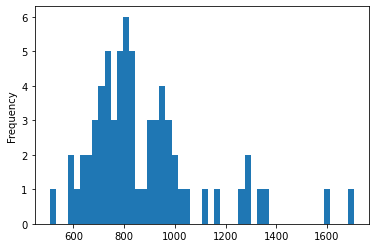

In [71]:
# Plot a histogram of the 2018 Average Monthly Rent

amr_spa['2018 Average Monthly Rent (Euros)'].plot.hist(bins=50)

In [72]:
# Extract the 'n_barri' and average monthly rent data to produce a bar chart.

amr_data = amr_spa[['n_barri', 
                    '2014 Average Monthly Rent (Euros)',
                    '2015 Average Monthly Rent (Euros)', 
                    '2016 Average Monthly Rent (Euros)', 
                    '2017 Average Monthly Rent (Euros)',
                    '2018 Average Monthly Rent (Euros)',
                    '2019 Average Monthly Rent (Euros)']]

In [73]:
# Print first 5 rows to check new dataframe

amr_data.head()

n_barri  2014 Average Monthly Rent (Euros)  \
0  Vallvidrera, el Tibidabo i les Planes                          1157.9125   
1                                SarriÃ                           1039.5050   
2             Sant Gervasi - la Bonanova                           940.0200   
3                                  Horta                           567.8525   
4                               el Raval                           578.4075   

   2015 Average Monthly Rent (Euros)  2016 Average Monthly Rent (Euros)  \
0                          1030.0475                          1177.1075   
1                          1100.4075                          1188.0025   
2                          1039.9675                          1123.6225   
3                           580.0100                           631.1025   
4                           624.7375                           667.3925   

   2017 Average Monthly Rent (Euros)  2018 Average Monthly Rent (Euros)  \
0                          1231.0100                           939.1125   
1                          1353.5350                          1362.0175   
2                          1235.2425                          1285.5925   
3                           698.0075                           747.6450   
4                           747.7150                           822.5525   

   2019 Average Monthly Rent (Euros)  
0                           1200.150  
1                           1369.950  
2                           1303.750  
3                            782.175  
4                            850.900

In [74]:
amr_data.shape

(67, 7)

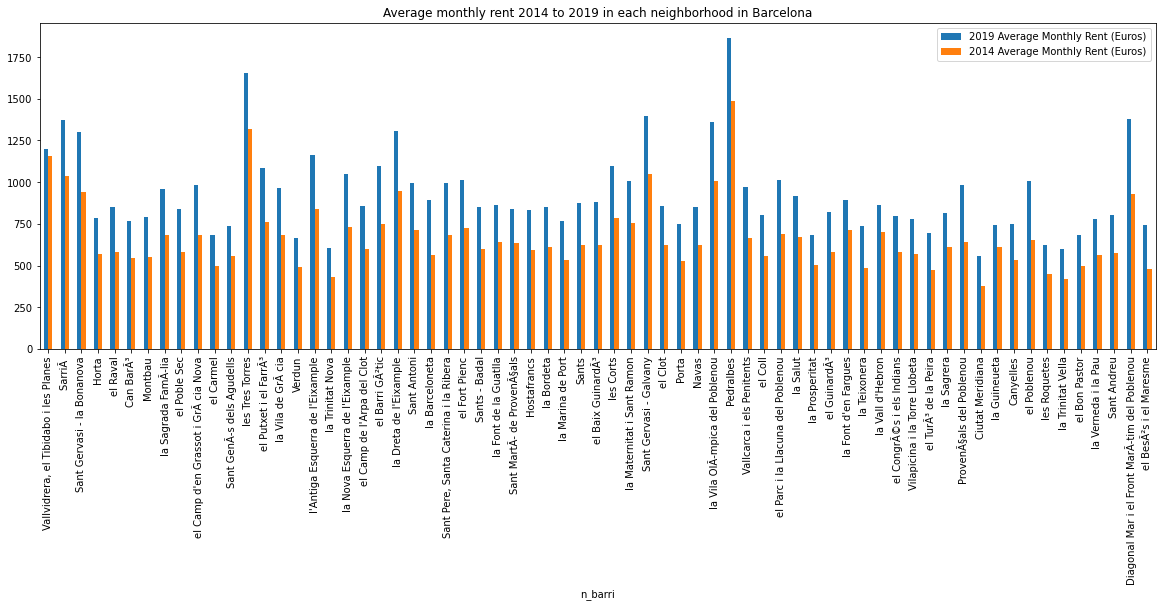

In [81]:
# Print a bar chart with the name of each neighborhood on the x-axis and the 2014-2019 Average Monthly Rent (Euros) on the 
# y axis. 

amr_data.plot.bar(figsize = (20, 6), 
                  x = 'n_barri', 
                  y = {'2014 Average Monthly Rent (Euros)',
                      # '2015 Average Monthly Rent (Euros)',
                      # '2016 Average Monthly Rent (Euros)',
                      # '2017 Average Monthly Rent (Euros)',
                      # '2018 Average Monthly Rent (Euros)',
                       '2019 Average Monthly Rent (Euros)'}, 
                  title = 'Average monthly rent 2014 to 2019 in each neighborhood in Barcelona')
plt.savefig('Bar Chart - Average Monthly Rent for Neighborhoods in Barcelona, 2014 to 2019.png',bbox_inches='tight')

Now we want to produce a line graph of the top five most expensive neighborhoods in Barcelona

In [82]:
# Data manipulation to produce a line graph
amr_data2 = amr_data.set_index('n_barri')
amr_data2.head()

2014 Average Monthly Rent (Euros)  \
n_barri                                                                    
Vallvidrera, el Tibidabo i les Planes                          1157.9125   
SarriÃ                                                         1039.5050   
Sant Gervasi - la Bonanova                                      940.0200   
Horta                                                           567.8525   
el Raval                                                        578.4075   

                                       2015 Average Monthly Rent (Euros)  \
n_barri                                                                    
Vallvidrera, el Tibidabo i les Planes                          1030.0475   
SarriÃ                                                         1100.4075   
Sant Gervasi - la Bonanova                                     1039.9675   
Horta                                                           580.0100   
el Raval                                                        624.7375   

                                       2016 Average Monthly Rent (Euros)  \
n_barri                                                                    
Vallvidrera, el Tibidabo i les Planes                          1177.1075   
SarriÃ                                                         1188.0025   
Sant Gervasi - la Bonanova                                     1123.6225   
Horta                                                           631.1025   
el Raval                                                        667.3925   

                                       2017 Average Monthly Rent (Euros)  \
n_barri                                                                    
Vallvidrera, el Tibidabo i les Planes                          1231.0100   
SarriÃ                                                         1353.5350   
Sant Gervasi - la Bonanova                                     1235.2425   
Horta                                                           698.0075   
el Raval                                                        747.7150   

                                       2018 Average Monthly Rent (Euros)  \
n_barri                                                                    
Vallvidrera, el Tibidabo i les Planes                           939.1125   
SarriÃ                                                         1362.0175   
Sant Gervasi - la Bonanova                                     1285.5925   
Horta                                                           747.6450   
el Raval                                                        822.5525   

                                       2019 Average Monthly Rent (Euros)  
n_barri                                                                   
Vallvidrera, el Tibidabo i les Planes                           1200.150  
SarriÃ                                                          1369.950  
Sant Gervasi - la Bonanova                                      1303.750  
Horta                                                            782.175  
el Raval                                                         850.900

In [84]:
# sort the data by 2019 average monthly rent, with the highest value first
amr_data_sort = amr_data2.sort_values('2019 Average Monthly Rent (Euros)',ascending=False)

In [85]:
amr_data_sort.head()

2014 Average Monthly Rent (Euros)  \
n_barri                                                                            
Pedralbes                                                               1489.345   
les Tres Torres                                                         1320.320   
Sant Gervasi - Galvany                                                  1046.650   
Diagonal Mar i el Front MarÃ­tim del Poblenou                            927.835   
SarriÃ                                                                  1039.505   

                                               2015 Average Monthly Rent (Euros)  \
n_barri                                                                            
Pedralbes                                                              1714.1450   
les Tres Torres                                                        1380.3525   
Sant Gervasi - Galvany                                                 1150.0725   
Diagonal Mar i el Front MarÃ­tim del Poblenou                          1032.6550   
SarriÃ                                                                 1100.4075   

                                               2016 Average Monthly Rent (Euros)  \
n_barri                                                                            
Pedralbes                                                              1653.6975   
les Tres Torres                                                        1512.7850   
Sant Gervasi - Galvany                                                 1238.5700   
Diagonal Mar i el Front MarÃ­tim del Poblenou                          1142.5575   
SarriÃ                                                                 1188.0025   

                                               2017 Average Monthly Rent (Euros)  \
n_barri                                                                            
Pedralbes                                                              1785.8850   
les Tres Torres                                                        1627.2025   
Sant Gervasi - Galvany                                                 1312.3650   
Diagonal Mar i el Front MarÃ­tim del Poblenou                          1109.9775   
SarriÃ                                                                 1353.5350   

                                               2018 Average Monthly Rent (Euros)  \
n_barri                                                                            
Pedralbes                                                              1707.0125   
les Tres Torres                                                        1598.6000   
Sant Gervasi - Galvany                                                 1346.9250   
Diagonal Mar i el Front MarÃ­tim del Poblenou                          1165.5800   
SarriÃ                                                                 1362.0175   

                                               2019 Average Monthly Rent (Euros)  
n_barri                                                                           
Pedralbes                                                               1863.175  
les Tres Torres                                                         1652.050  
Sant Gervasi - Galvany                                                  1396.575  
Diagonal Mar i el Front MarÃ­tim del Poblenou                           1381.825  
SarriÃ                                                                  1369.950

In [86]:
# create a dataframe with the five most expensive barris from 2019 data
amr_data_topbarri = amr_data_sort.head(5)

In [87]:
# swap axes in order to plot the line graph 
amr_data3_topbarri = amr_data_topbarri.swapaxes("index", "columns")

In [88]:
amr_data3_topbarri

n_barri                            Pedralbes  les Tres Torres  \
2014 Average Monthly Rent (Euros)  1489.3450        1320.3200   
2015 Average Monthly Rent (Euros)  1714.1450        1380.3525   
2016 Average Monthly Rent (Euros)  1653.6975        1512.7850   
2017 Average Monthly Rent (Euros)  1785.8850        1627.2025   
2018 Average Monthly Rent (Euros)  1707.0125        1598.6000   
2019 Average Monthly Rent (Euros)  1863.1750        1652.0500   

n_barri                            Sant Gervasi - Galvany  \
2014 Average Monthly Rent (Euros)               1046.6500   
2015 Average Monthly Rent (Euros)               1150.0725   
2016 Average Monthly Rent (Euros)               1238.5700   
2017 Average Monthly Rent (Euros)               1312.3650   
2018 Average Monthly Rent (Euros)               1346.9250   
2019 Average Monthly Rent (Euros)               1396.5750   

n_barri                            Diagonal Mar i el Front MarÃ­tim del Poblenou  \
2014 Average Monthly Rent (Euros)                                       927.8350   
2015 Average Monthly Rent (Euros)                                      1032.6550   
2016 Average Monthly Rent (Euros)                                      1142.5575   
2017 Average Monthly Rent (Euros)                                      1109.9775   
2018 Average Monthly Rent (Euros)                                      1165.5800   
2019 Average Monthly Rent (Euros)                                      1381.8250   

n_barri                              SarriÃ   
2014 Average Monthly Rent (Euros)  1039.5050  
2015 Average Monthly Rent (Euros)  1100.4075  
2016 Average Monthly Rent (Euros)  1188.0025  
2017 Average Monthly Rent (Euros)  1353.5350  
2018 Average Monthly Rent (Euros)  1362.0175  
2019 Average Monthly Rent (Euros)  1369.9500

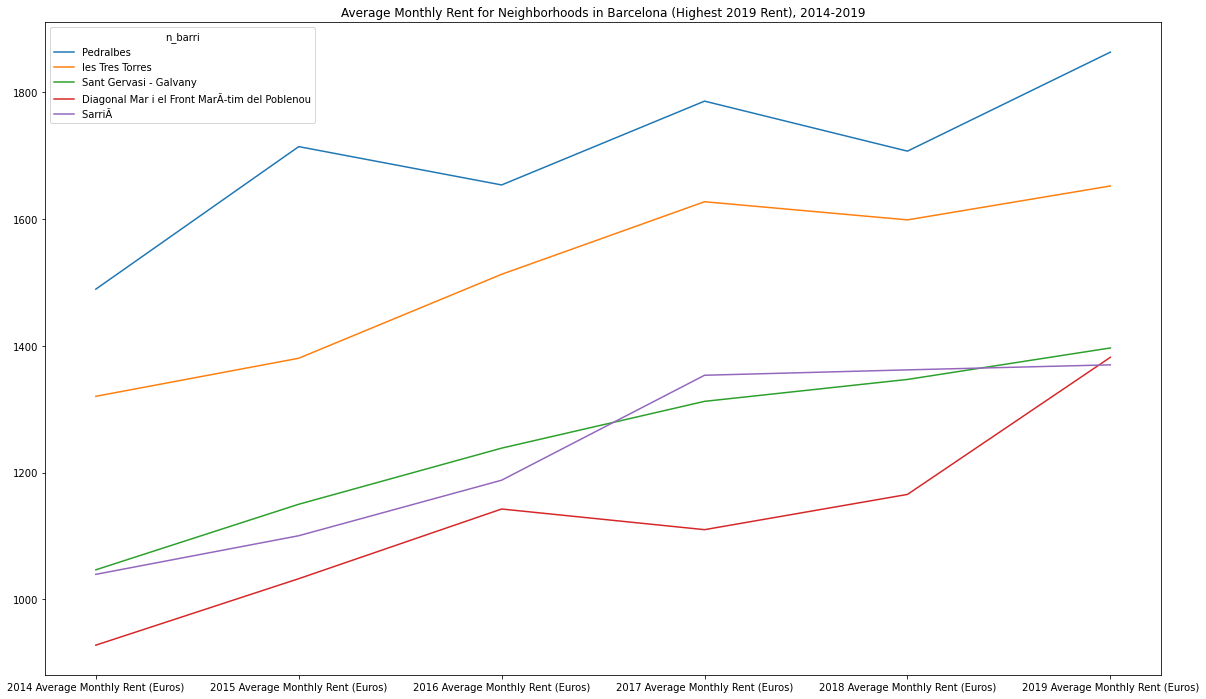

In [89]:
amr_data3_topbarri.plot.line(figsize = (20,12), 
                             title='Average Monthly Rent for Neighborhoods in Barcelona (Highest 2019 Rent), 2014-2019', 
                             #fontsize=12,
                             #xlabel={'2014 Average Monthly Rent (Euros)':'2014','2015 Average Monthly Rent (Euros)':'2015'},
                             #rot=90,
                             legend=True)
plt.savefig('Line Graph - Average Monthly Rent for Neighborhoods in Barcelona, 2014-2019.png',bbox_inches='tight')

In [90]:
# We'll have to figure out some better formatting techniques for the future

### Compare 2018 rental demand and offer price data

We want to compare the demand and offer rental prices for 2018, as well as the 2018 average monthly rent. 

In [91]:
adorp2018_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

   2018 Average Demand Rental Price (Euros)  \
0                                    967.51   
1                                   1389.21   
2                                   1293.98   
3                                    735.94   
4                                    771.43   

   2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                  1521.90                           939.1125  
1                                  1875.03                          1362.0175  
2                                  1858.58                          1285.5925  
3                                   939.49                           747.6450  
4                                  1159.45                           822.5525

In [92]:
adorp2018_spa.dtypes

c_barri                                        int64
n_barri                                       object
geometry                                    geometry
2018 Average Demand Rental Price (Euros)     float64
2018 Average Offer Rental Price (Euros)      float64
2018 Average Monthly Rent (Euros)            float64
dtype: object

In [93]:
adorp2018_spa

c_barri                                        n_barri  \
0        22          Vallvidrera, el Tibidabo i les Planes   
1        23                                        SarriÃ    
2        25                     Sant Gervasi - la Bonanova   
3        43                                          Horta   
4         1                                       el Raval   
..      ...                                            ...   
61       59                                  el Bon Pastor   
62       73                            la Verneda i la Pau   
63       60                                    Sant Andreu   
64       69  Diagonal Mar i el Front MarÃ­tim del Poblenou   
65       70                         el BesÃ²s i el Maresme   

                                             geometry  \
0   MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1   MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2   MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3   MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4   MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   
..                                                ...   
61  MULTIPOLYGON (((2.20834 41.42868, 2.20673 41.4...   
62  MULTIPOLYGON (((2.20834 41.42868, 2.20830 41.4...   
63  MULTIPOLYGON (((2.19835 41.44873, 2.19777 41.4...   
64  MULTIPOLYGON (((2.22281 41.40575, 2.22341 41.4...   
65  MULTIPOLYGON (((2.22281 41.40575, 2.22149 41.4...   

    2018 Average Demand Rental Price (Euros)  \
0                                     967.51   
1                                    1389.21   
2                                    1293.98   
3                                     735.94   
4                                     771.43   
..                                       ...   
61                                    713.09   
62                                    758.35   
63                                    769.29   
64                                    927.74   
65                                    751.59   

    2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                   1521.90                           939.1125  
1                                   1875.03                          1362.0175  
2                                   1858.58                          1285.5925  
3                                    939.49                           747.6450  
4                                   1159.45                           822.5525  
..                                      ...                                ...  
61                                   913.90                           683.9825  
62                                   965.29                           739.5300  
63                                   925.95                           764.1725  
64                                  2050.20                          1165.5800  
65                                  1047.19                           685.5550  

[66 rows x 6 columns]

In [94]:
# create dataframe to use for stats
adorp2018_data = adorp2018_spa[['c_barri','n_barri','2018 Average Demand Rental Price (Euros)','2018 Average Offer Rental Price (Euros)','2018 Average Monthly Rent (Euros)']]

In [95]:
adorp2018_data.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

   2018 Average Demand Rental Price (Euros)  \
0                                    967.51   
1                                   1389.21   
2                                   1293.98   
3                                    735.94   
4                                    771.43   

   2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                  1521.90                           939.1125  
1                                  1875.03                          1362.0175  
2                                  1858.58                          1285.5925  
3                                   939.49                           747.6450  
4                                  1159.45                           822.5525

In [96]:
# for consistency, we're using the same five barris as the average monthly rent data. This was a challenge. 
adorp2018_data_topbarri = adorp2018_data.loc[(adorp2018_data['n_barri'] == 'Pedralbes') | (adorp2018_data['n_barri'] == 'les Tres Torres') |(adorp2018_data['n_barri'] == 'Sant Gervasi - Galvany')|(adorp2018_data['c_barri'] == 69)|(adorp2018_data['c_barri'] == 23)]

In [97]:
adorp2018_data_topbarri

c_barri                                        n_barri  \
1        23                                        SarriÃ    
12       24                                les Tres Torres   
36       26                         Sant Gervasi - Galvany   
41       21                                      Pedralbes   
64       69  Diagonal Mar i el Front MarÃ­tim del Poblenou   

    2018 Average Demand Rental Price (Euros)  \
1                                    1389.21   
12                                   1667.37   
36                                   1362.47   
41                                   1719.74   
64                                    927.74   

    2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
1                                   1875.03                          1362.0175  
12                                  2475.54                          1598.6000  
36                                  2076.07                          1346.9250  
41                                  2611.63                          1707.0125  
64                                  2050.20                          1165.5800

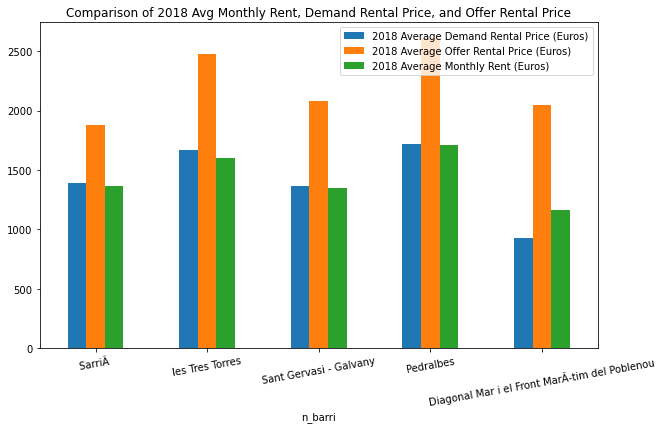

In [98]:
adorp2018_data_topbarri.plot.bar(figsize=(10,6),
                                 title='Comparison of 2018 Avg Monthly Rent, Demand Rental Price, and Offer Rental Price',
                                 x='n_barri',
                                 y={'2018 Average Demand Rental Price (Euros)',
                                    '2018 Average Offer Rental Price (Euros)',
                                    '2018 Average Monthly Rent (Euros)'},
                                rot=10)

plt.savefig('Bar Chart - Comparison of 2018 Average Monthly Rent, Average Demand Rental Price, and Average Offer Rental Price.png',bbox_inches='tight')


### Create maps

Try some overall maps with the Average Monthly Rent data. Create sets of subplots side-by-side.

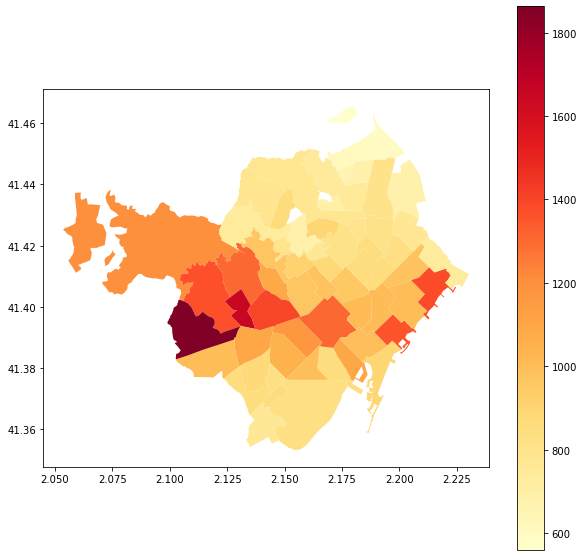

In [101]:
# Test a map! Here's a map of 2019 Average Monthly Rent by neighborhood. A beautiful moment, really.

amr_spa.plot(figsize=(10,10),column='2019 Average Monthly Rent (Euros)',cmap='YlOrRd',legend=True)

In [102]:
bb.head()

cartodb_id c_distri              n_distri  c_barri  \
0          22       05  SarriÃ -Sant Gervasi       22   
1          23       05  SarriÃ -Sant Gervasi       23   
2          25       05  SarriÃ -Sant Gervasi       25   
3          43       07       Horta-GuinardÃ³       43   
4          12       03       Sants-MontjuÃ¯c       12   

                                 n_barri  homes  dones          area  \
0  Vallvidrera, el Tibidabo i les Planes   2269   2397  1.152241e+07   
1                                SarriÃ   11552  13267  3.041669e+06   
2             Sant Gervasi - la Bonanova  11777  13797  2.235228e+06   
3                                  Horta  12590  14086  3.082269e+06   
4             la Marina del Prat Vermell    577    561  1.428413e+07   

          perim        coord_x       coord_y  \
0  34375.351100  423973.042970  4.585950e+06   
1  10353.319052  426217.739662  4.584038e+06   
2   8692.896014  427395.900450  4.584820e+06   
3  10888.952207  429246.476929  4.588141e+06   
4  43242.508489  428356.498514  4.576986e+06   

                                   web_1  \
0  http://www.bcn.cat/sarria-santgervasi   
1  http://www.bcn.cat/sarria-santgervasi   
2  http://www.bcn.cat/sarria-santgervasi   
3      http://www.bcn.cat/horta-guinardo   
4      http://www.bcn.cat/sants-montjuic   

                                               web_2  \
0  http://www.bcn.cat/estadistica/catala/dades/in...   
1  http://www.bcn.cat/estadistica/catala/dades/in...   
2  http://www.bcn.cat/estadistica/catala/dades/in...   
3  http://www.bcn.cat/estadistica/catala/dades/in...   
4  http://www.bcn.cat/estadistica/catala/dades/in...   

                                               web_3  \
0  http://www.bcn.cat/estadistica/catala/dades/gu...   
1  http://www.bcn.cat/estadistica/catala/dades/gu...   
2  http://www.bcn.cat/estadistica/catala/dades/gu...   
3  http://www.bcn.cat/estadistica/catala/dades/gu...   
4  http://www.bcn.cat/estadistica/catala/dades/gu...   

                                               web_4  \
0  http://www.bcn.cat/estadistica/catala/dades/in...   
1  http://www.bcn.cat/estadistica/catala/dades/in...   
2  http://www.bcn.cat/estadistica/catala/dades/in...   
3  http://www.bcn.cat/estadistica/catala/dades/in...   
4  http://www.bcn.cat/estadistica/catala/dades/in...   

                                            geometry  
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...  
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...  
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...  
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...  
4  MULTIPOLYGON (((2.17878 41.37342, 2.17860 41.3...

In [103]:
bb_n = bb.set_index('n_barri')

In [120]:
# Plot an interactive map of the barris

fig = px.choropleth(bb_n,
                   geojson=bb_n.geometry,                   
                    locations=bb_n.index,
                  color="c_barri",
                    color_continuous_scale="YlOrRd",
                  projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.write_html("Barri Map.html")
plt.savefig('Barri Map.png',bbox_inches='tight')
fig.show()

<Figure size 432x288 with 0 Axes>

In [109]:
amr_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

   2014 Average Monthly Rent (Euros)  2014 Average Monthly Rent (Euros/m^2)  \
0                          1157.9125                                 9.7025   
1                          1039.5050                                13.5175   
2                           940.0200                                11.5575   
3                           567.8525                                 8.9350   
4                           578.4075                                10.4825   

   2015 Average Monthly Rent (Euros)  2015 Average Monthly Rent (Euros/m^2)  \
0                          1030.0475                                12.1975   
1                          1100.4075                                14.4050   
2                          1039.9675                                12.6550   
3                           580.0100                                 9.5725   
4                           624.7375                                10.9975   

   2016 Average Monthly Rent (Euros)  2016 Average Monthly Rent (Euros/m^2)  \
0                          1177.1075                                15.3125   
1                          1188.0025                                15.9475   
2                          1123.6225                                14.2175   
3                           631.1025                                10.6200   
4                           667.3925                                12.2700   

   2017 Average Monthly Rent (Euros)  2017 Average Monthly Rent (Euros/m^2)  \
0                          1231.0100                                16.6600   
1                          1353.5350                                17.4475   
2                          1235.2425                                15.3175   
3                           698.0075                                11.6425   
4                           747.7150                                13.8950   

   2018 Average Monthly Rent (Euros)  2018 Average Monthly Rent (Euros/m^2)  \
0                           939.1125                                12.0675   
1                          1362.0175                                17.1825   
2                          1285.5925                                16.1000   
3                           747.6450                                11.8250   
4                           822.5525                                14.0175   

   2019 Average Monthly Rent (Euros)  2019 Average Monthly Rent (Euros/m^2)  
0                           1200.150                                 13.775  
1                           1369.950                                 16.825  
2                           1303.750                                 16.025  
3                            782.175                                 12.425  
4                            850.900                                 14.325

In [110]:
amr_spa_n = amr_spa.set_index('n_barri')

In [133]:
# Create a map with a mapbox background 

fig = px.choropleth_mapbox(bb_n, geojson=bb_n.geometry, color="c_barri",
                           color_continuous_scale="Viridis",
                           locations=bb_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri "},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("Barri Map with Background.html")
#plt.savefig('Barri Map with Background.png',bbox_inches='tight')
fig.show()

<Figure size 432x288 with 0 Axes>

In [134]:
# Create a map that shows 2019 Average Monthly rent, and is interactive

fig = px.choropleth_mapbox(amr_spa_n, geojson=amr_spa_n.geometry, color="2019 Average Monthly Rent (Euros)",
                           color_continuous_scale="YlOrRd",
                           locations=amr_spa_n.index, #featureidkey='n_barri',
                           labels={'n_barri':"Barri"},
                           center={"lat": 41.3851, "lon": 2.1734},
                           mapbox_style="carto-positron", zoom=10)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.write_html("2019 Average Monthly Rent (Euros) Map.html")
fig.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(amr_spa,
                   geojson=amr_spa.geometry,                   
                    locations=amr_spa.index,
                  color="2014 Average Monthly Rent (Euros)",
                    featureidkey="n_barri",
                  projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

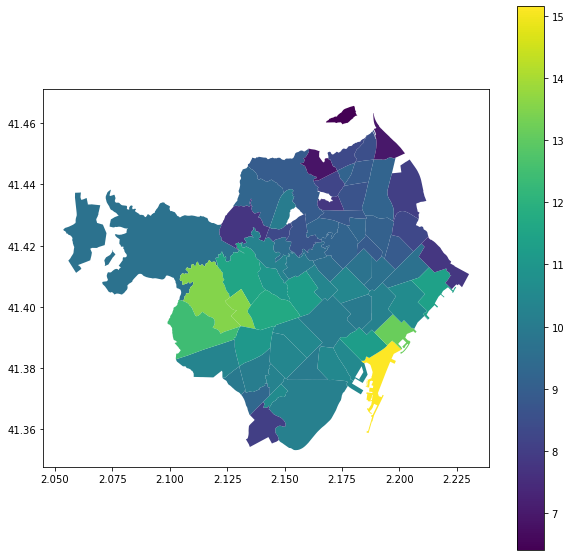

In [135]:
# Here's a map of 2014 Average Monthly Rent / m^2 by neighborhood. 

amr_spa.plot(figsize=(10,10),
                   column='2014 Average Monthly Rent (Euros/m^2)',
                   legend=True)

### Create subplots to compare multiple data

Things I would like to learn:
- how to set the two subplots to the same scale/scheme so that they can be directly compared. 

In [137]:
adorp2018_spa.head()

c_barri                                n_barri  \
0       22  Vallvidrera, el Tibidabo i les Planes   
1       23                                SarriÃ    
2       25             Sant Gervasi - la Bonanova   
3       43                                  Horta   
4        1                               el Raval   

                                            geometry  \
0  MULTIPOLYGON (((2.07327 41.41383, 2.07165 41.4...   
1  MULTIPOLYGON (((2.12062 41.41357, 2.12065 41.4...   
2  MULTIPOLYGON (((2.13042 41.42065, 2.13049 41.4...   
3  MULTIPOLYGON (((2.16268 41.44105, 2.16273 41.4...   
4  MULTIPOLYGON (((2.17119 41.38659, 2.17180 41.3...   

   2018 Average Demand Rental Price (Euros)  \
0                                    967.51   
1                                   1389.21   
2                                   1293.98   
3                                    735.94   
4                                    771.43   

   2018 Average Offer Rental Price (Euros)  2018 Average Monthly Rent (Euros)  
0                                  1521.90                           939.1125  
1                                  1875.03                          1362.0175  
2                                  1858.58                          1285.5925  
3                                   939.49                           747.6450  
4                                  1159.45                           822.5525

Text(0.5, 1.0, '2018 Average Offer Rental Price in Barcelona')

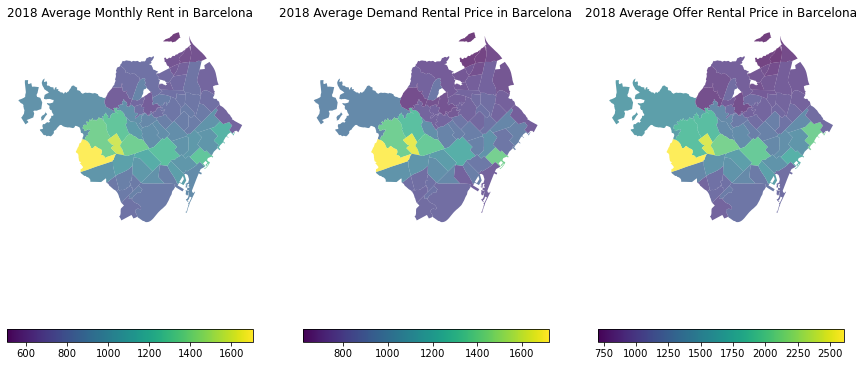

In [142]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# name each subplot
ax1, ax2, ax3 = axs

# Left map
adorp2018_spa.plot(column = '2018 Average Monthly Rent (Euros)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            #scheme = 'quantiles',
            k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True,
            legend_kwds={'orientation': "horizontal"})
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("2018 Average Monthly Rent in Barcelona") # add a title to ax1

# Middle map
adorp2018_spa.plot(column = '2018 Average Demand Rental Price (Euros)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True,
                  legend_kwds={'orientation': "horizontal"})

ax2.axis("off")
ax2.set_title("2018 Average Demand Rental Price in Barcelona")

# Right map
adorp2018_spa.plot(column = '2018 Average Offer Rental Price (Euros)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax3, # this assigns the map to the subplot
            legend = True,
                  legend_kwds={'orientation': "horizontal"})

ax3.axis("off")
ax3.set_title("2018 Average Offer Rental Price in Barcelona")

I would like to figure out how to make these scales constant. 
https://github.com/geopandas/geopandas/issues/1019 (for next time)

Text(0.5, 1.0, 'Average 2019 Monthly Rent / m^2 in Barcelona')

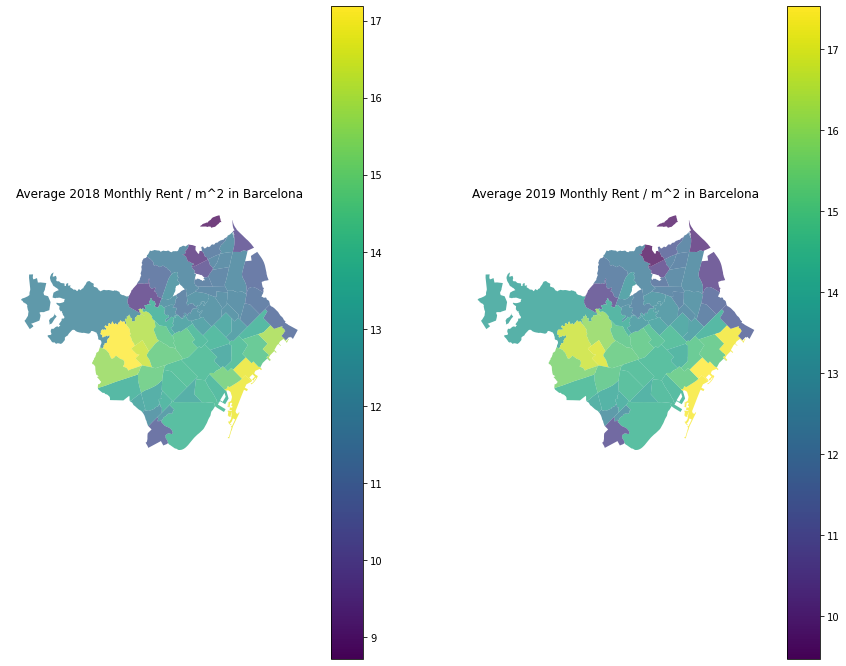

In [143]:
# Create subplots: one row, two plots

fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# Left map
amr_spa.plot(column = '2018 Average Monthly Rent (Euros/m^2)', 
            cmap = 'viridis', # Is there a reason this color looks faded (and better) in these subplots?
            #scheme = 'quantiles',
            k = 5, # five buckets 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax1, # this assigns the map to the subplot,
            legend = True)
           

ax1.axis("off") # turns off x and y axis numbers 
ax1.set_title("Average 2018 Monthly Rent / m^2 in Barcelona") # add a title to ax1

# Right map
amr_spa.plot(column = '2019 Average Monthly Rent (Euros/m^2)', 
            cmap = 'viridis', 
           # scheme = 'quantiles',
            k = 5, 
            edgecolor = 'white', 
            linewidth = 0., 
            alpha = 0.75, 
            ax = ax2, # this assigns the map to the subplot
            legend = True)

ax2.axis("off")
ax2.set_title("Average 2019 Monthly Rent / m^2 in Barcelona")

### End of file

We created two jupyter notebooks for our midterm assignment: 
1. Midterm_Barcelona_Average_Monthly_Rent
2. Midterm_Spain_Housing_Mkt

The work was divided evenly between the two of us. We worked on our own notebooks, but collaborated and helped each other solve coding issues, find the correct data, and put together the presentation. 
* Casey: coded Midterm_Barcelona_Average_Monthly_Rent
* Tiffany: coded Midterm_Spain_Housing_Mkt